In [1]:
cd ~/PycharmProjects/CleanSpace/momia2/

/Users/jzrolling/PycharmProjects/CleanSpace/momia2


In [70]:
import matplotlib.pyplot as plt, pandas as pd, numpy as np, tifffile,glob,os
from skimage import filters, morphology, feature, draw, measure, segmentation,exposure
import seaborn as sns
from matplotlib import colormaps as cm
import momia2 as mo
import tensorflow as tf
import keras
import edt

In [7]:
k = 0
n_channels=3
size=256
model = keras.models.load_model('/Users/jzrolling/Desktop/Projects/ZTT_Persister_ROS/Microscopy_training_set/20240110_Unet/')

In [106]:
img = tifffile.imread('/Users/jzrolling/Desktop/Projects/ZTT_Persister_ROS/Microscopy_training_set/20231101_Manual_annotation/20.tif')
norm_img = exposure.adjust_gamma(mo.utils.normalize_image(img,mask=None),gamma=0.6)

In [107]:
patchifier = mo.segment.Patchifier(img_shape=img.shape,patch_size=size,pad=8)
images=patchifier.pachify(norm_img)
images = np.expand_dims(images,-1)

In [108]:
x = model.predict(images)

1/1 [==============================] - 0s 101ms/step


In [109]:
pred = patchifier.unpatchify(x,n_channel=n_channels,)

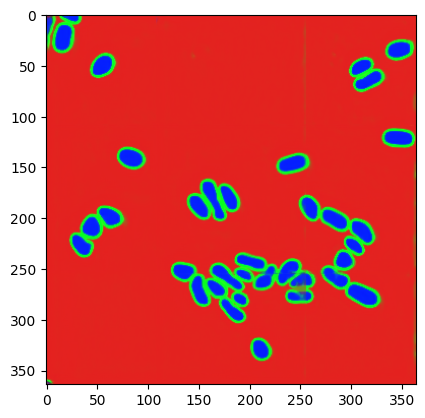

In [110]:
plt.imshow(pred)

In [81]:
x.shape

(4, 256, 256, 3)